## PBL(1) Project 를 위한 실습(연습)

1. https://agtechlab.pythonanywhere.com/ 에 접속하여 회원가입해 주세요. (비밀번호는 단순하게 만드는 것을 권장. 예: 1234)
2. `username` 에 이메일 형식의 아이디를 기입해 주세요.
3. `password` 에 비밀번호를 기입해 주세요.

In [1]:
project = "housingprice"  # 수정하지 마세요
username = ""  # 회원가입 시 사용한 이메일아이디 (예시. abc@hello.com)
password = ""  # 비밀번호

리더보드 제출을 위한 기본 설정: 아래 코드를 실행해주세요.

In [4]:
import os
import urllib.request

if not os.path.exists("competition.py"):
    url = "https://raw.githubusercontent.com/agtechresearch/LectureMLbasic/refs/heads/main/competition/competition.py"
    filename = "competition.py"
    urllib.request.urlretrieve(url, filename)

아래 코드를 실행하여 데이터를 다운로드 받습니다: 3개의 csv 파일이 data 폴더에 다운로드됨

 * dataset.csv: 과거 주택매매 데이터 -> 학습에 사용할 데이터셋
 * problem.csv: 현재 A사가 매매를 고려하고 있는 130건의 주택정보 -> ML 모델에 의하여 예측을 수행하여야 할 데이터셋
 * submission.csv: 리더보드 서버 제출을 위한 파일 형식

In [5]:
import competition

# 파일 다운로드
competition.download_competition_files(project)

100%|██████████| 141k/141k [00:00<00:00, 1.07MiB/s]


Colab 환경에서 한글 폰트 설정을 위한 라이브러리 설치
(한글이 깨져서 나타날 경우 설치)

In [6]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 42.6 MB/s eta 0:00:00


필요한 라이브러리들의 import 및 dataset 경로 설정

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import warnings

# 경고 무시
warnings.filterwarnings("ignore")

# Data 경로 설정
DATA_DIR = "dataset"

In [9]:
# 학습에 사용할 과거 주택매매 data set 로드 (dataset.csv)
dataset = pd.read_csv(os.path.join(DATA_DIR, "dataset.csv"))

# problem set 로드 (problem.csv)
problemset = pd.read_csv(os.path.join(DATA_DIR, "problem.csv"))

In [10]:
# 변수가 24개가 있으므로, 모든 변수를 출력하려면 다음과 같이 설정해야 함
pd.options.display.max_columns = 30
dataset  # 학습에 사용할 과거 주택매매 데이터셋 확인: 1340건의 과거 주택매매 데이터셋

,Id,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice
0,1,8450,Pave,Inside,7,5,2003,2003,856,856,854,1710,2,1,3,1,8,0,Attchd,2003.0,2,548,2008,208500
1,2,9600,Pave,FR2,6,8,1976,1976,1262,1262,0,1262,2,0,3,1,6,1,Attchd,1976.0,2,460,2007,181500
2,3,11250,Pave,Inside,7,5,2001,2002,920,920,866,1786,2,1,3,1,6,1,Attchd,2001.0,2,608,2008,223500
3,4,9550,Pave,Corner,7,5,1915,1970,756,961,756,1717,1,0,3,1,7,1,Detchd,1998.0,3,642,2006,140000
4,5,14260,Pave,FR2,8,5,2000,2000,1145,1145,1053,2198,2,1,4,1,9,1,Attchd,2000.0,3,836,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,9042,Pave,Inside,7,9,1941,2006,1152,1188,1152,2340,2,0,4,1,9,2,Attchd,1941.0,1,252,2010,266500
1336,1337,9717,Pave,Inside,5,6,1950,1996,1078,1078,0,1078,1,0,2,1,5,0,Attchd,1950.0,1,240,2010,142125
1337,1338,9937,Pave,Inside,5,6,1965,1965,1256,1256,0,1256,1,1,3,1,6,0,Attchd,1965.0,1,276,2008,147500
1338,1339,9600,Pave,Inside,5,7,1940,1950,728,976,332,1308,1,1,2,1,7,2,Detchd,1940.0,1,256,2009,160000


In [11]:
# 실제 타겟 변수명으로 변경
TARGET_COLUMN = 'SalePrice'

In [12]:
# problem set 확인: 130건의 문제 데이터셋 (SalePrice를 예측해야 함)
problemset

,Id,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold
0,1341,11200,Pave,Inside,5,5,1965,1965,1040,1040,0,1040,1,0,3,1,5,0,Detchd,1965,1,384,2008
1,1342,7200,Pave,Corner,5,7,1951,2000,900,900,0,900,1,0,3,1,5,0,Detchd,2005,2,576,2010
2,1343,16905,Pave,Inside,5,6,1959,1959,1350,1328,0,1328,1,1,2,1,5,2,Attchd,1959,1,308,2007
3,1344,9180,Pave,CulDSac,5,7,1983,1983,840,884,0,884,1,0,2,1,5,0,Attchd,1983,2,504,2007
4,1345,7200,Pave,Inside,5,7,1920,1996,530,581,530,1111,1,0,3,1,6,0,Detchd,1935,1,288,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1466,11478,Pave,Inside,8,5,2007,2008,1704,1704,0,1704,2,0,3,1,7,1,Attchd,2008,3,772,2010
126,1467,16321,Pave,CulDSac,5,6,1957,1997,1484,1600,0,1600,1,0,2,1,6,2,Attchd,1957,1,319,2006
127,1468,6324,Pave,Inside,4,6,1927,1950,520,520,0,520,1,0,1,1,4,0,Detchd,1920,1,240,2008
128,1469,8500,Pave,Inside,4,4,1920,1950,649,649,668,1317,1,0,3,1,6,0,Detchd,1920,1,250,2008


## 1. 데이터 기본 정보 확인 ##


1) dataset.head()

2) dataset.tail()

3) dataset.shape

4) dataset.info()

5) dataset.describe()

6) dataset.describe(include=['object', 'category'])


In [14]:
print("--- 데이터 첫 5행 ---")
dataset.head()

--- 데이터 첫 5행 ---


,Id,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice
0,1,8450,Pave,Inside,7,5,2003,2003,856,856,854,1710,2,1,3,1,8,0,Attchd,2003.0,2,548,2008,208500
1,2,9600,Pave,FR2,6,8,1976,1976,1262,1262,0,1262,2,0,3,1,6,1,Attchd,1976.0,2,460,2007,181500
2,3,11250,Pave,Inside,7,5,2001,2002,920,920,866,1786,2,1,3,1,6,1,Attchd,2001.0,2,608,2008,223500
3,4,9550,Pave,Corner,7,5,1915,1970,756,961,756,1717,1,0,3,1,7,1,Detchd,1998.0,3,642,2006,140000
4,5,14260,Pave,FR2,8,5,2000,2000,1145,1145,1053,2198,2,1,4,1,9,1,Attchd,2000.0,3,836,2008,250000


In [15]:
print("\n--- 데이터 마지막 5행 ---")
dataset.tail()


--- 데이터 마지막 5행 ---


,Id,LotArea,Street,LotConfig,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice
1335,1336,9042,Pave,Inside,7,9,1941,2006,1152,1188,1152,2340,2,0,4,1,9,2,Attchd,1941.0,1,252,2010,266500
1336,1337,9717,Pave,Inside,5,6,1950,1996,1078,1078,0,1078,1,0,2,1,5,0,Attchd,1950.0,1,240,2010,142125
1337,1338,9937,Pave,Inside,5,6,1965,1965,1256,1256,0,1256,1,1,3,1,6,0,Attchd,1965.0,1,276,2008,147500
1338,1339,9600,Pave,Inside,5,7,1940,1950,728,976,332,1308,1,1,2,1,7,2,Detchd,1940.0,1,256,2009,160000
1339,1340,7390,Pave,Inside,5,7,1955,1955,1098,1098,0,1098,1,0,3,1,6,0,Attchd,1955.0,1,260,2008,135000


In [16]:
print("\n--- 데이터 형태 (행, 열) ---")
dataset.shape


--- 데이터 형태 (행, 열) ---


(1340, 24)

In [17]:
print("\n--- 데이터 정보 (컬럼별 타입, Non-Null 개수) ---")
dataset.info()


--- 데이터 정보 (컬럼별 타입, Non-Null 개수) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1340 non-null   int64  
 1   LotArea       1340 non-null   int64  
 2   Street        1340 non-null   object 
 3   LotConfig     1340 non-null   object 
 4   OverallQual   1340 non-null   int64  
 5   OverallCond   1340 non-null   int64  
 6   YearBuilt     1340 non-null   int64  
 7   YearRemodAdd  1340 non-null   int64  
 8   TotalBsmtSF   1340 non-null   int64  
 9   1stFlrSF      1340 non-null   int64  
 10  2ndFlrSF      1340 non-null   int64  
 11  GrLivArea     1340 non-null   int64  
 12  FullBath      1340 non-null   int64  
 13  HalfBath      1340 non-null   int64  
 14  BedroomAbvGr  1340 non-null   int64  
 15  KitchenAbvGr  1340 non-null   int64  
 16  TotRmsAbvGrd  1340 non-null   int64  
 17  Fireplaces    1340 non-null   int

In [18]:
print("\n--- 수치형 데이터 기술 통계 ---")
dataset.describe()


--- 수치형 데이터 기술 통계 ---


,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1259.000000,1340.000000,1340.00000,1340.000000,1340.000000
mean,670.500000,10394.688806,6.085821,5.578358,1971.035075,1984.713433,1053.474627,1160.035821,343.435821,1508.731343,1.557463,0.382836,2.866418,1.049254,6.517164,0.607463,1978.359809,1.750746,468.71791,2007.812687,179731.313433
std,386.968991,9390.128474,1.382471,1.113691,30.166372,20.645194,442.467334,386.181183,433.178069,523.054350,0.553740,0.504354,0.819428,0.226592,1.627482,0.640625,24.621588,0.755734,215.18436,1.325339,78153.434985
min,1.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.00000,2006.000000,34900.000000
25%,335.750000,7500.000000,5.000000,5.000000,1953.750000,1966.750000,794.000000,882.000000,0.000000,1121.750000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.50000,2007.000000,129500.000000
50%,670.500000,9468.500000,6.000000,5.000000,1972.000000,1993.000000,986.500000,1083.500000,0.000000,1456.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,476.50000,2008.000000,161250.000000
75%,1005.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,1291.500000,1383.000000,728.000000,1775.250000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.00000,2009.000000,213000.000000
max,1340.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,6110.000000,4692.000000,1872.000000,5642.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.00000,2010.000000,755000.000000


In [19]:
print("\n--- 범주형 데이터 기술 통계 ---")
dataset.describe(include=['object', 'category'])


--- 범주형 데이터 기술 통계 ---


,Street,LotConfig,GarageType
count,1340,1340,1259
unique,2,5,6
top,Pave,Inside,Attchd
freq,1336,969,790


In [20]:
print("\n--- 고유값 개수 ---")
for col in dataset.columns:
    print(f"컬럼 '{col}'의 고유값 개수: {dataset[col].nunique()}")


--- 고유값 개수 ---
컬럼 'Id'의 고유값 개수: 1340
컬럼 'LotArea'의 고유값 개수: 991
컬럼 'Street'의 고유값 개수: 2
컬럼 'LotConfig'의 고유값 개수: 5
컬럼 'OverallQual'의 고유값 개수: 10
컬럼 'OverallCond'의 고유값 개수: 9
컬럼 'YearBuilt'의 고유값 개수: 112
컬럼 'YearRemodAdd'의 고유값 개수: 61
컬럼 'TotalBsmtSF'의 고유값 개수: 684
컬럼 '1stFlrSF'의 고유값 개수: 713
컬럼 '2ndFlrSF'의 고유값 개수: 391
컬럼 'GrLivArea'의 고유값 개수: 815
컬럼 'FullBath'의 고유값 개수: 4
컬럼 'HalfBath'의 고유값 개수: 3
컬럼 'BedroomAbvGr'의 고유값 개수: 8
컬럼 'KitchenAbvGr'의 고유값 개수: 4
컬럼 'TotRmsAbvGrd'의 고유값 개수: 12
컬럼 'Fireplaces'의 고유값 개수: 4
컬럼 'GarageType'의 고유값 개수: 6
컬럼 'GarageYrBlt'의 고유값 개수: 96
컬럼 'GarageCars'의 고유값 개수: 5
컬럼 'GarageArea'의 고유값 개수: 422
컬럼 'YrSold'의 고유값 개수: 5
컬럼 'SalePrice'의 고유값 개수: 623


## 2. 결측치(missing values) 확인과 시각화(heatmap)

In [21]:
print("\n--- 컬럼별 결측치 개수 ---")
print(dataset.isnull().sum())

print("\n--- 컬럼별 결측치 비율 (%) ---")
print((dataset.isnull().sum() / len(dataset) * 100).sort_values(ascending=False))


--- 컬럼별 결측치 개수 ---
Id               0
LotArea          0
Street           0
LotConfig        0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageType      81
GarageYrBlt     81
GarageCars       0
GarageArea       0
YrSold           0
SalePrice        0
dtype: int64

--- 컬럼별 결측치 비율 (%) ---
GarageYrBlt     6.044776
GarageType      6.044776
Id              0.000000
LotArea         0.000000
OverallQual     0.000000
OverallCond     0.000000
Street          0.000000
LotConfig       0.000000
YearRemodAdd    0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
1stFlrSF        0.000000
FullBath        0.000000
HalfBath        0.000000
2ndFlrSF        0.000000
GrLivArea       0.000000
KitchenAbvGr    0.000000
BedroomAbvGr    0.000000
Fireplaces      0.000000
TotRmsAbvGrd

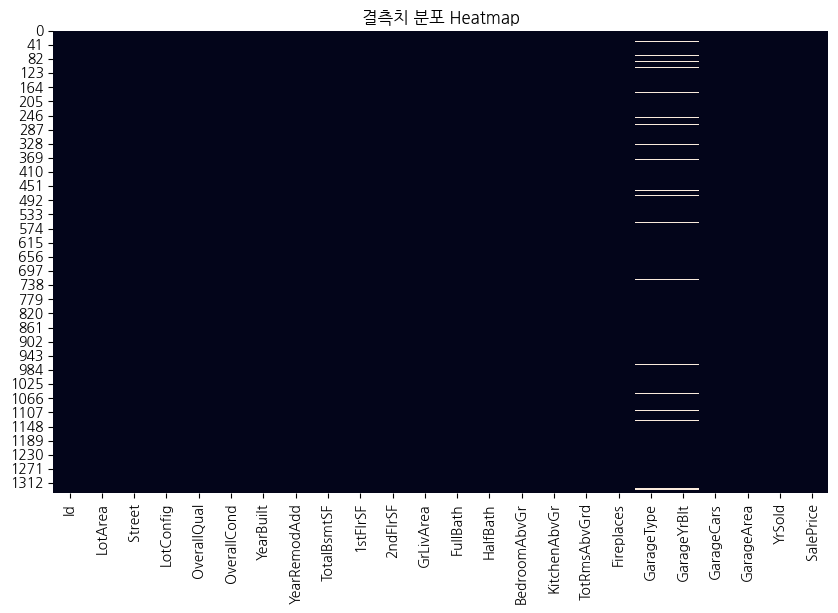

In [28]:
# 결측치 시각화 (Heatmap)
plt.figure(figsize=(10, 6))

#heatmap 코드를 아래에 입력해주세요
sns.heatmap(dataset.isnull(), cbar=False)

plt.title('결측치 분포 Heatmap')
plt.show()

## 3. 중복된 행 확인

In [33]:
duplicate_rows = dataset.duplicated()
print(f"\n--- 중복된 행의 개수: {duplicate_rows.sum()} ---")
#print(dataset[duplicate_rows])


--- 중복된 행의 개수: 0 ---


## 4. 데이터 분포 시각화: 수치형 변수 분포 시각화


--- 수치형 변수: ['Id', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'YrSold'] ---


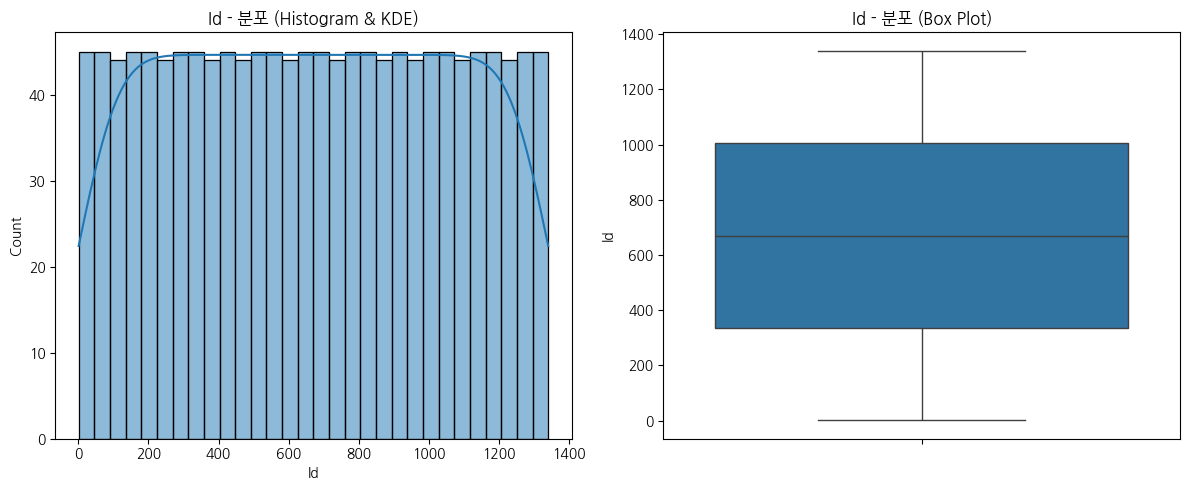

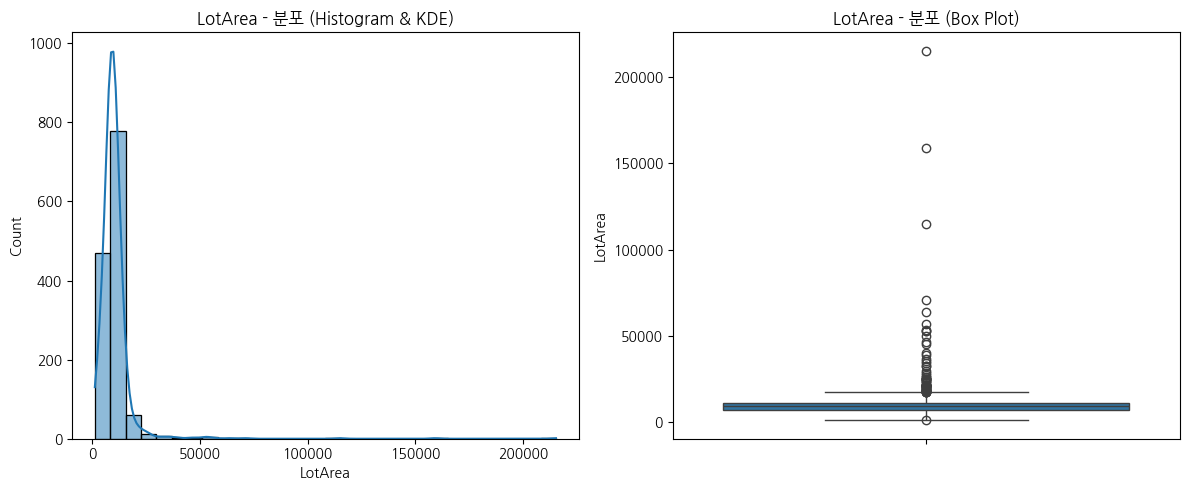

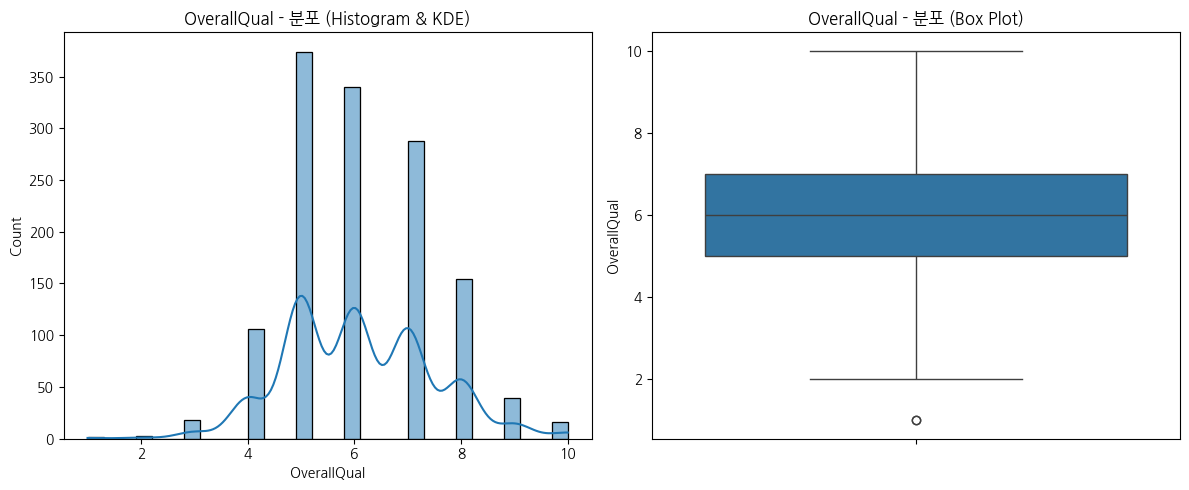

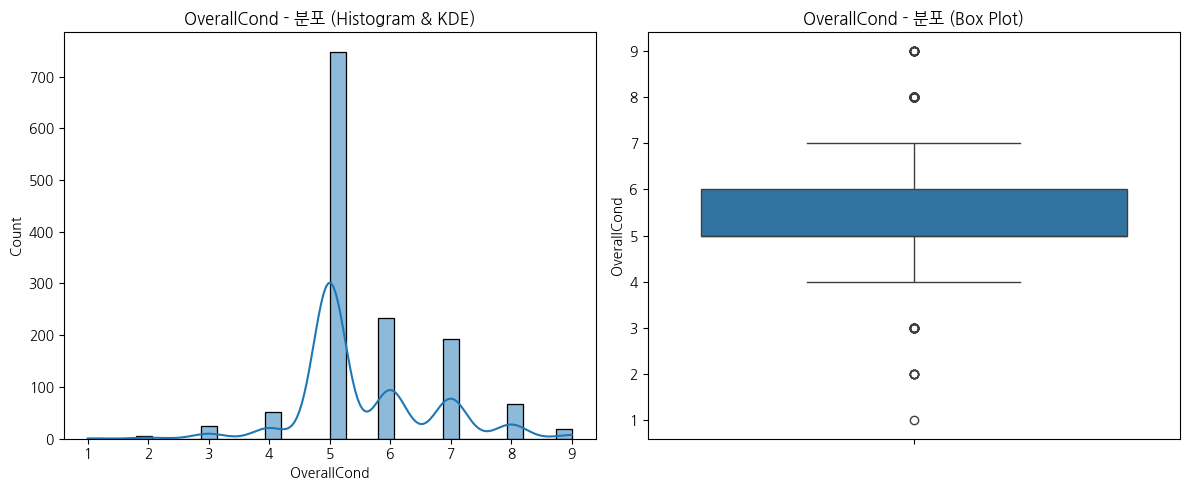

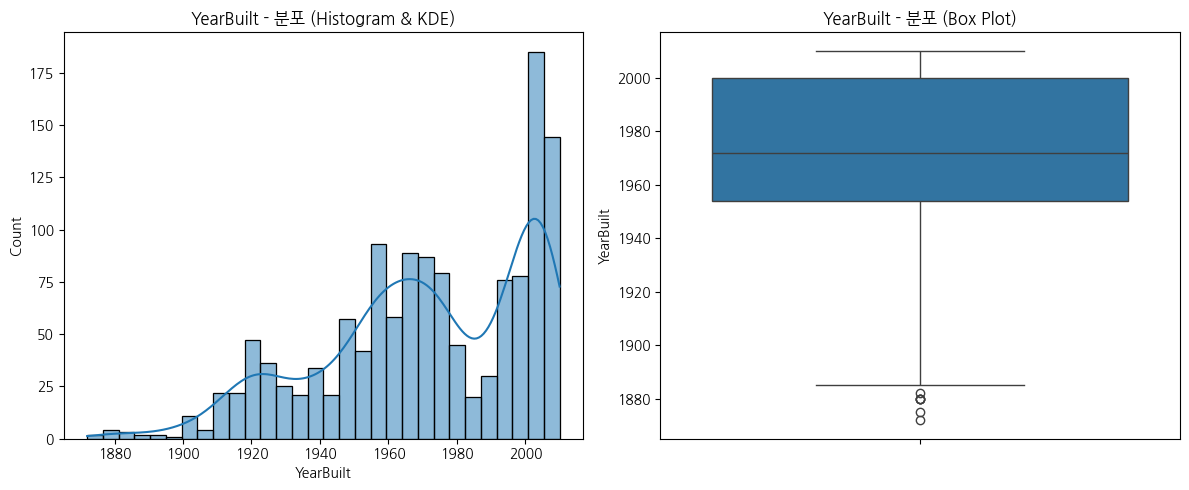

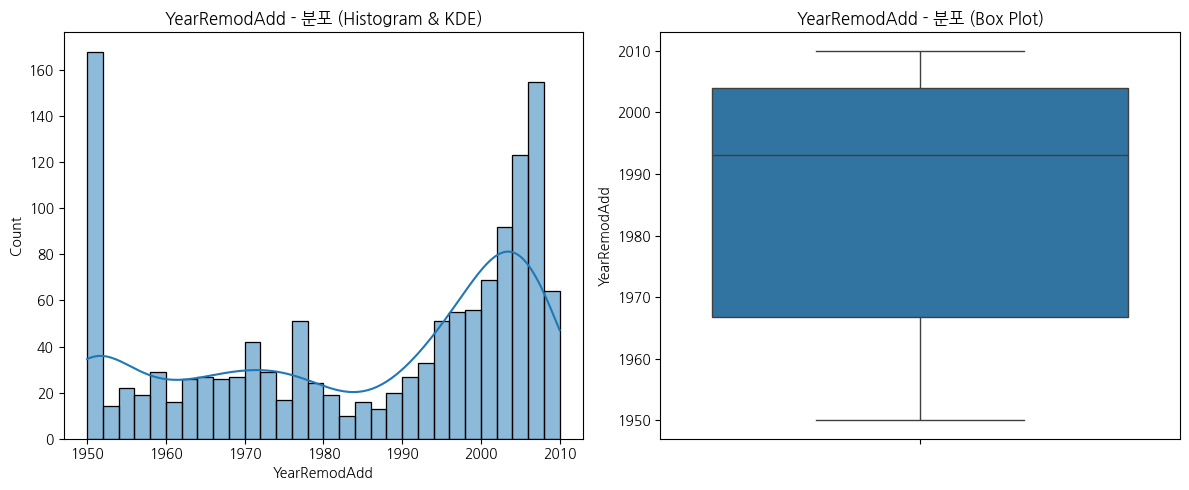

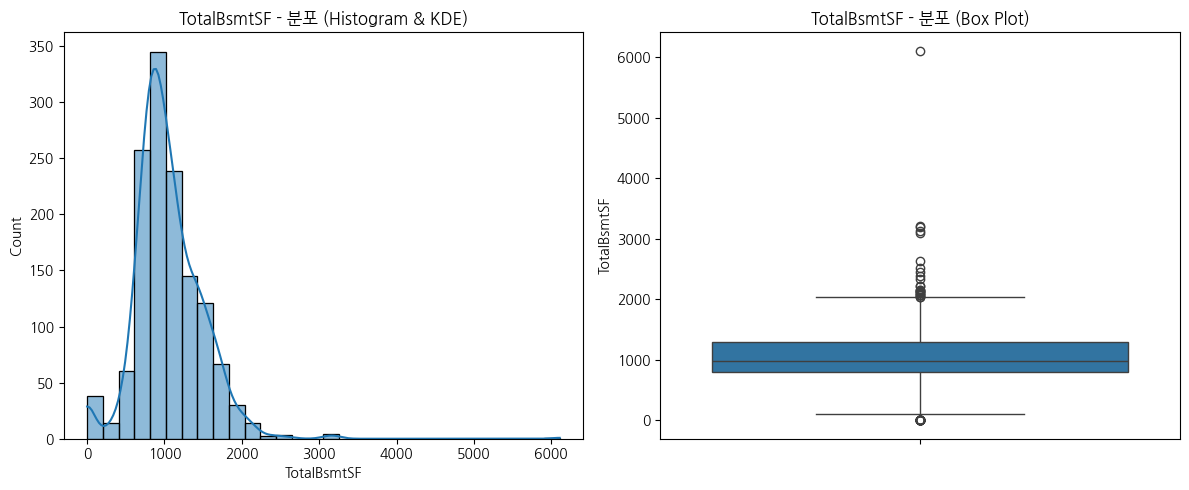

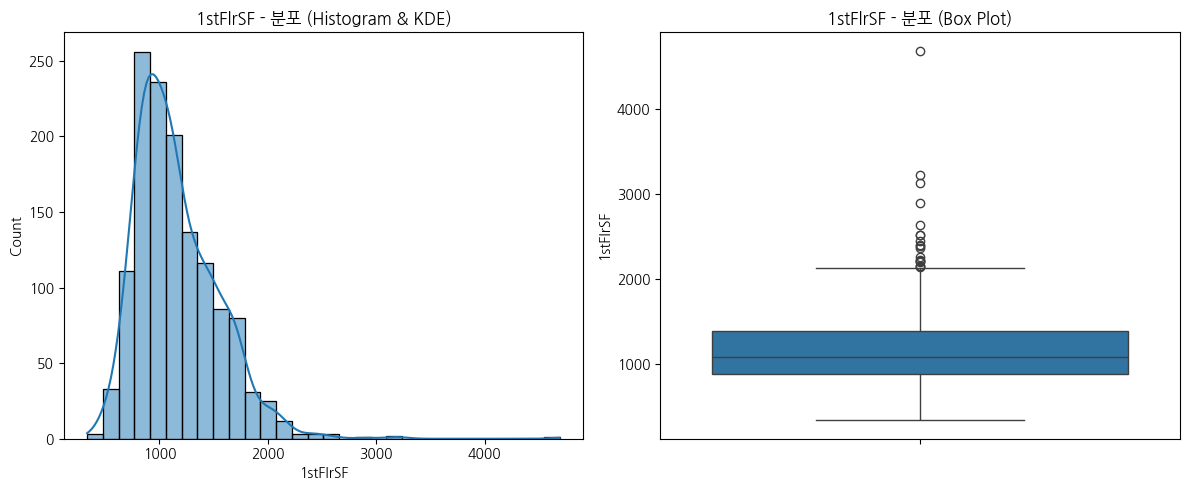

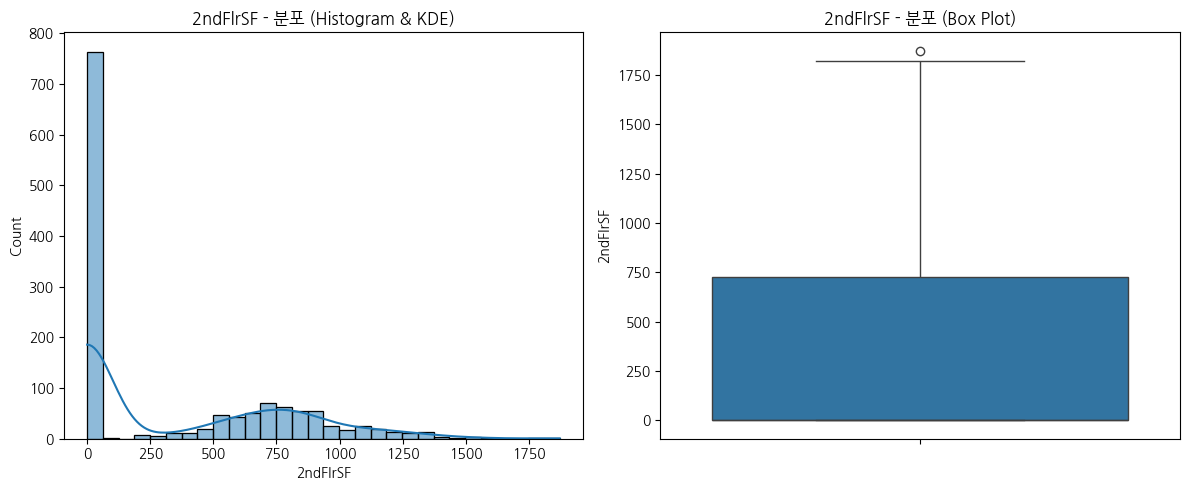

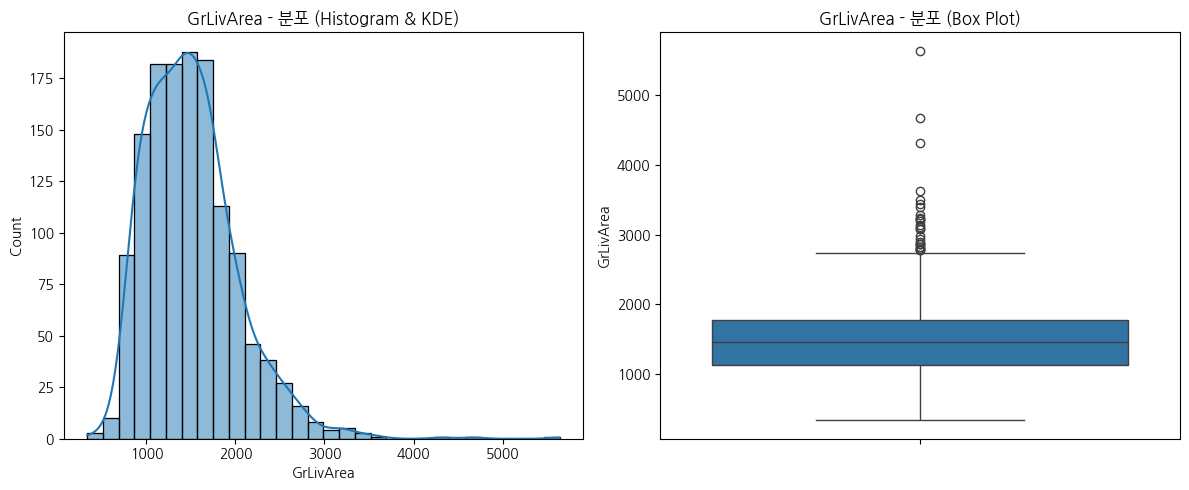

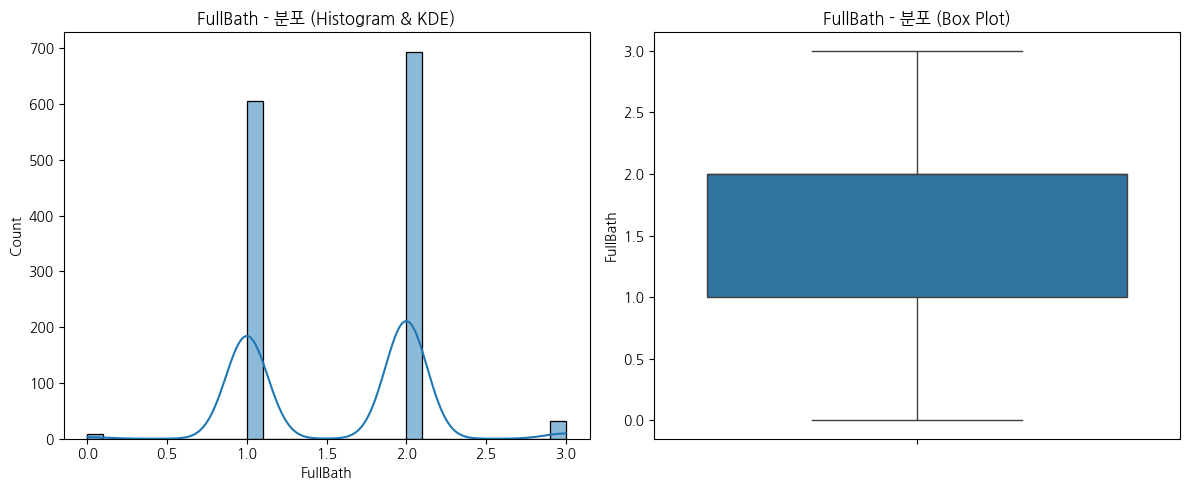

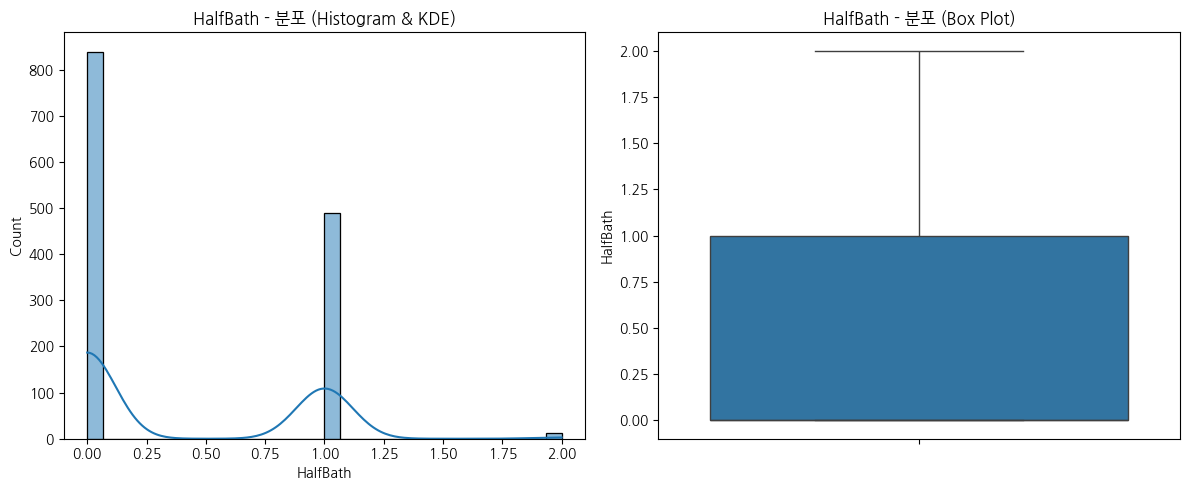

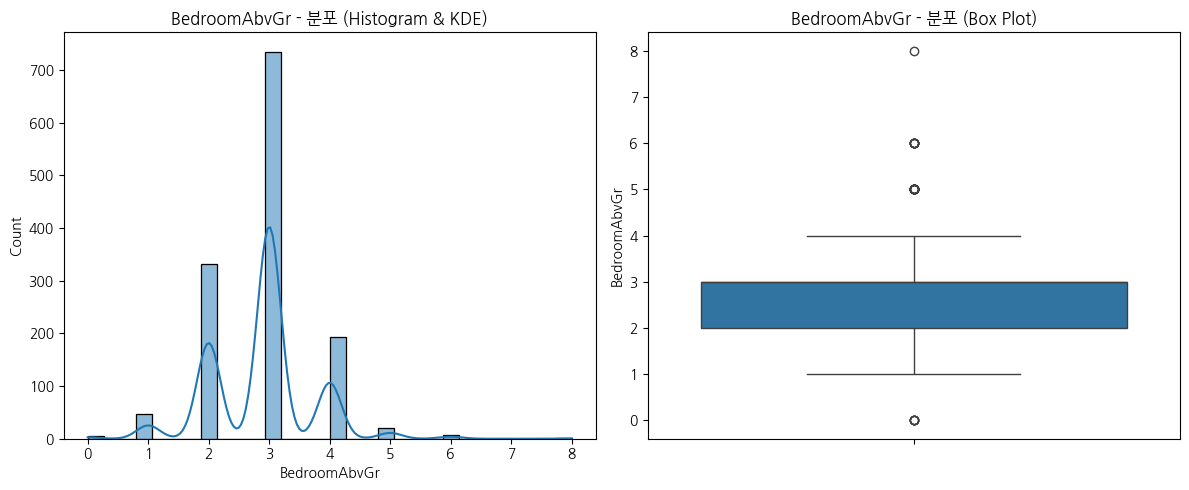

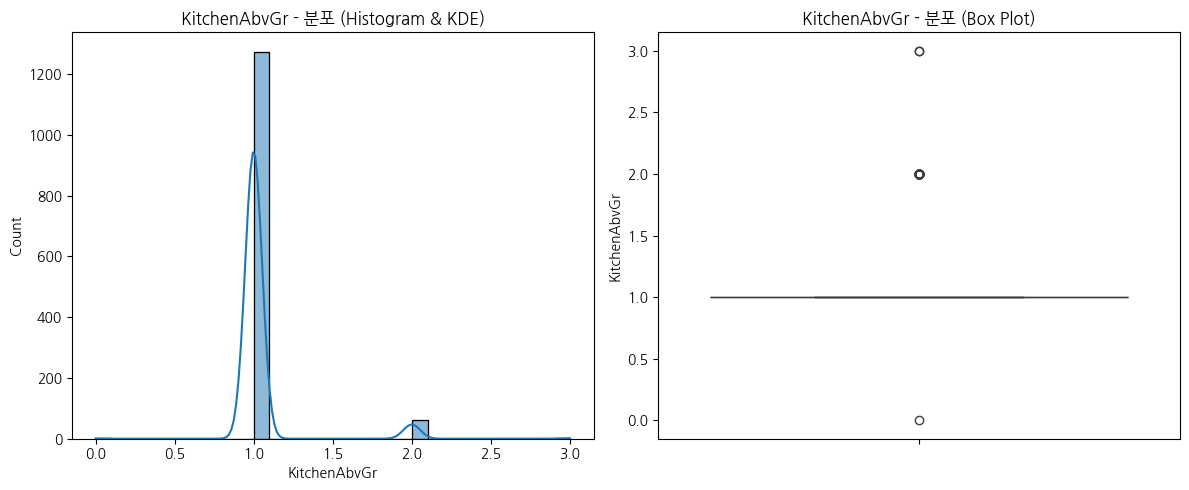

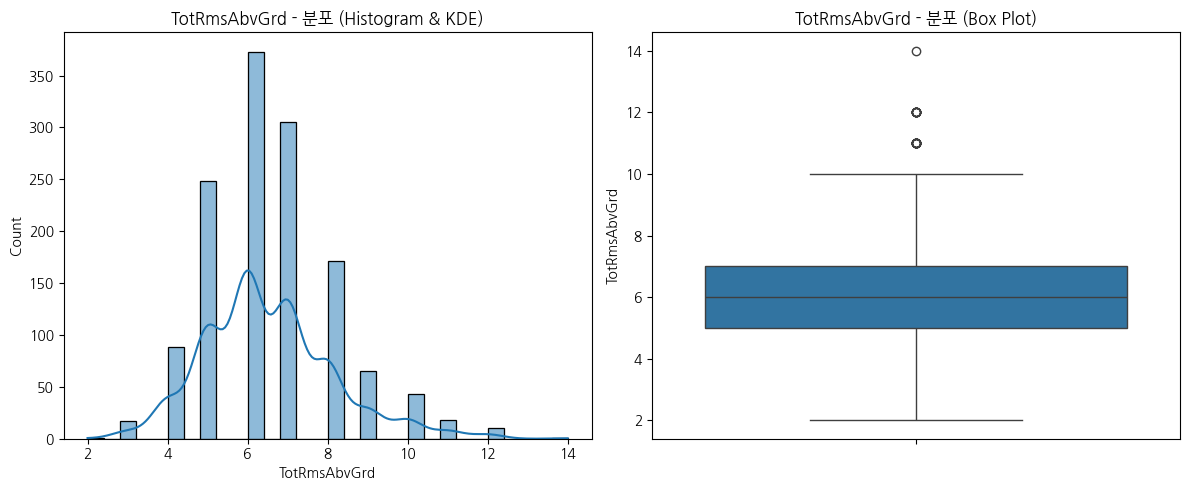

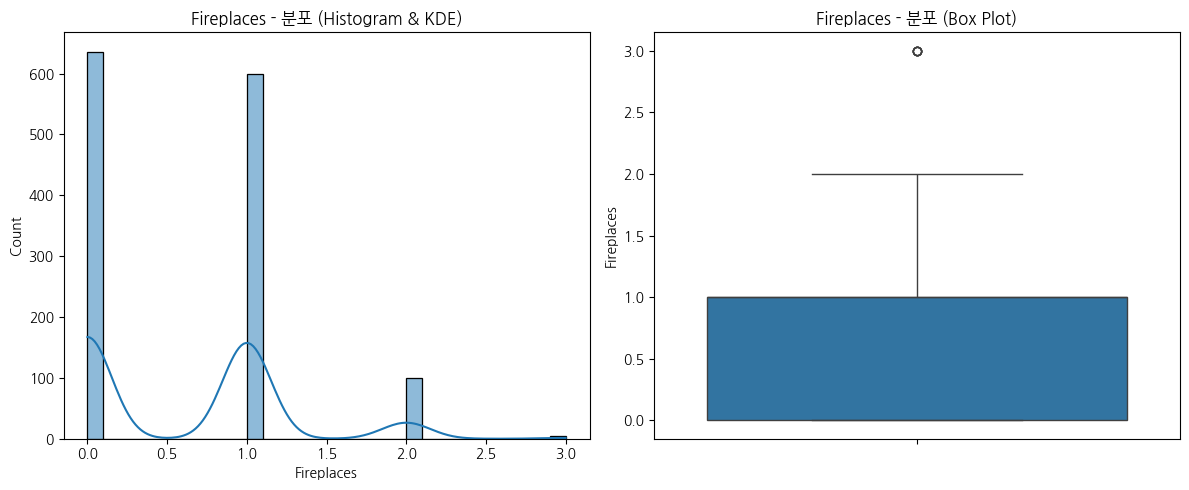

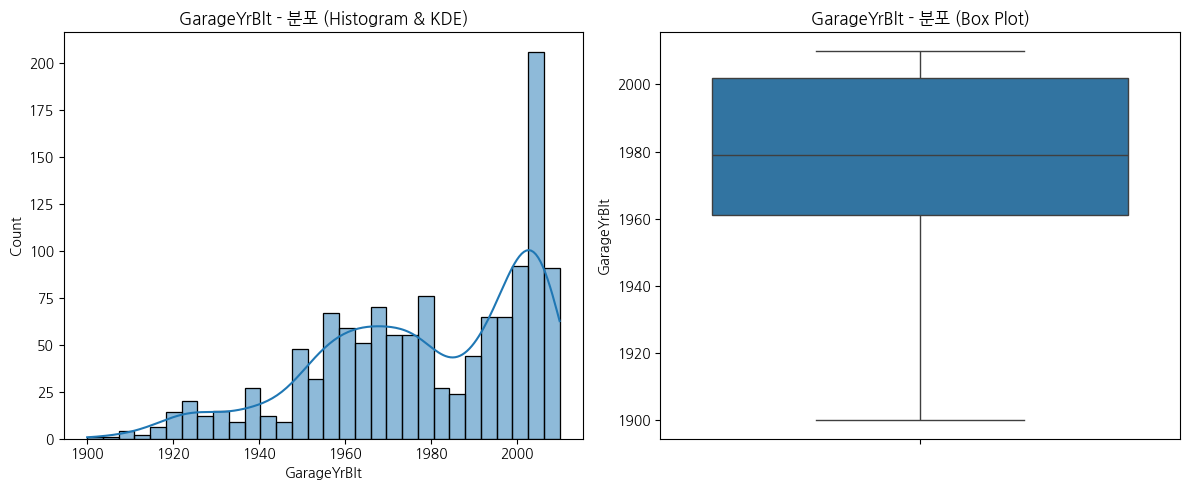

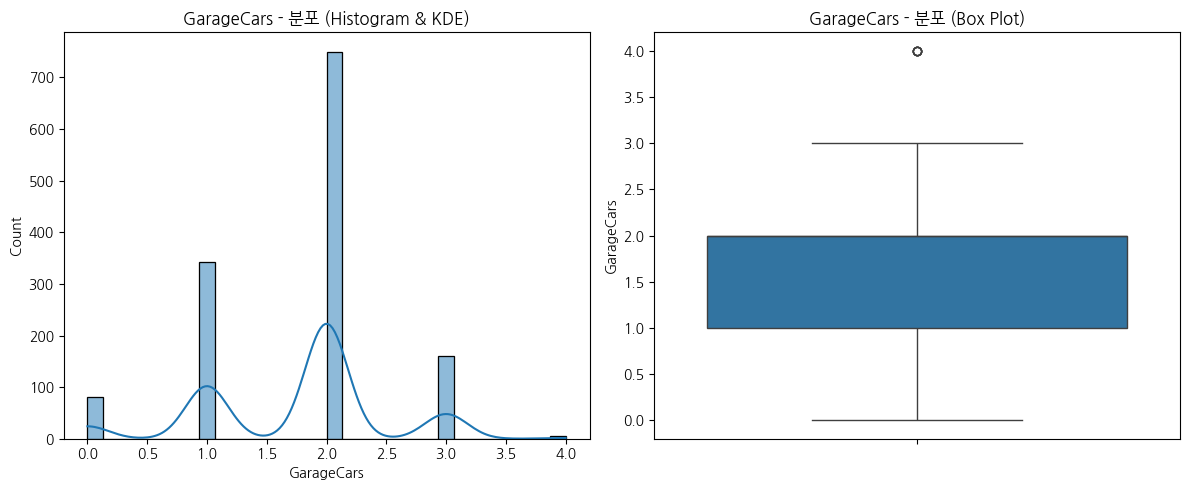

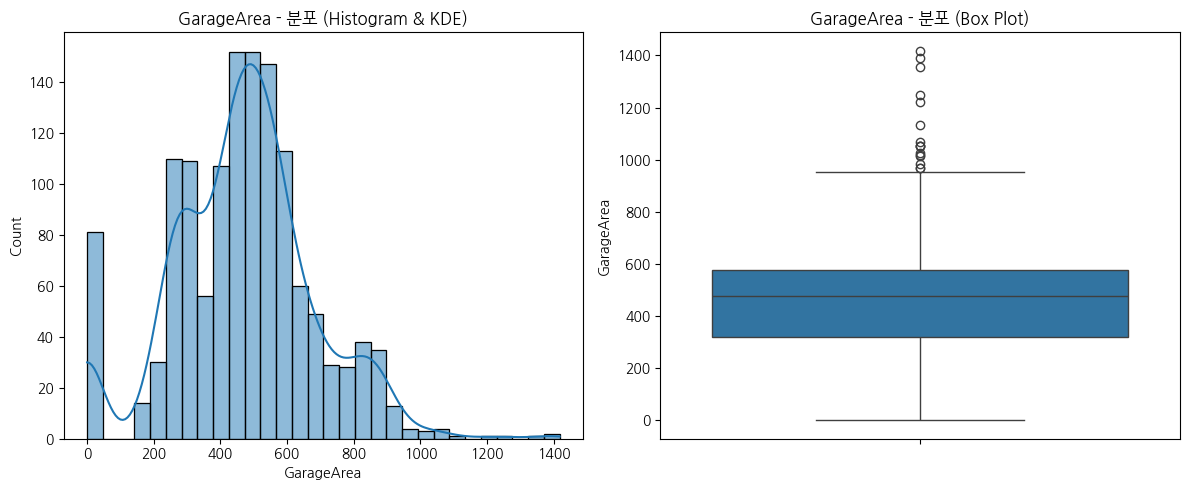

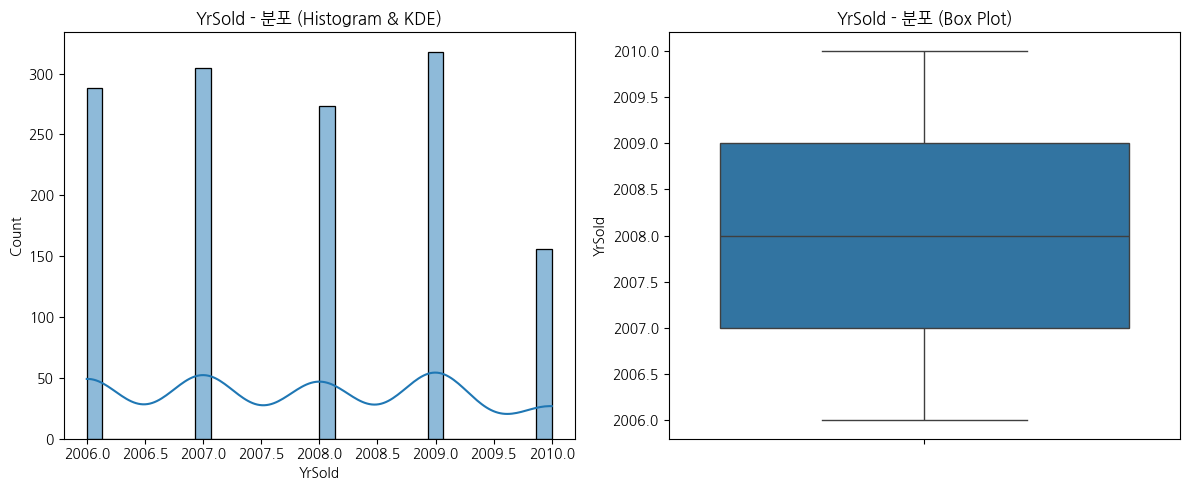

In [41]:
numerical_variables = dataset.select_dtypes(include=np.number).columns

if TARGET_COLUMN in numerical_variables:
    numerical_variables_excluding_target = numerical_variables.drop(TARGET_COLUMN)
else:
    numerical_variables_excluding_target = numerical_variables

print(f"\n--- 수치형 변수: {numerical_variables_excluding_target.tolist()} ---")

for col in numerical_variables_excluding_target:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)

    sns.histplot(dataset[col], kde=True, bins=30)


    plt.title(f'{col} - 분포 (Histogram & KDE)')  #KDE: Kernel Density Estimation(데이터의 분포를 부드러운 곡선으로 표시)

    plt.subplot(1, 2, 2)
    sns.boxplot(y=dataset[col])
    plt.title(f'{col} - 분포 (Box Plot)')

    plt.tight_layout()
    plt.show()

## 5. 데이터 분포 시각화: 범주형 변수 분포 시각화


--- 범주형 변수: ['Street', 'LotConfig', 'GarageType'] ---


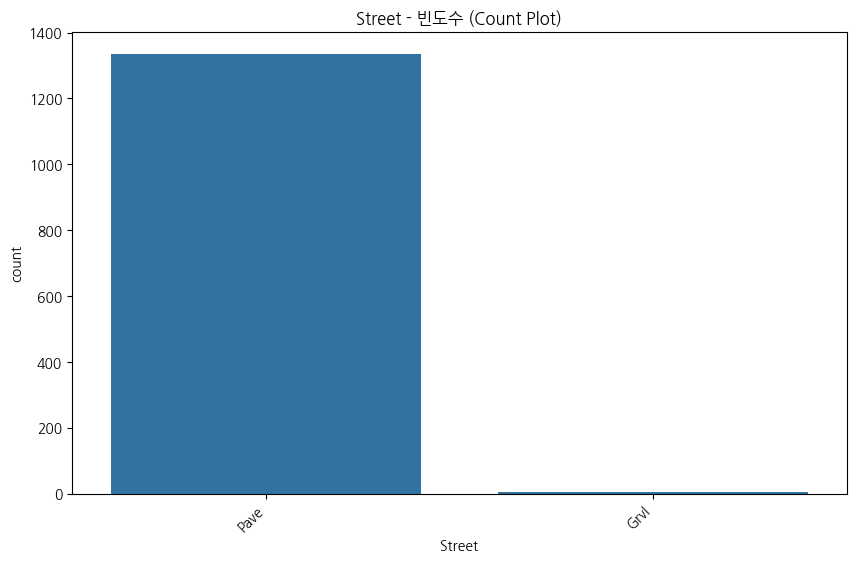

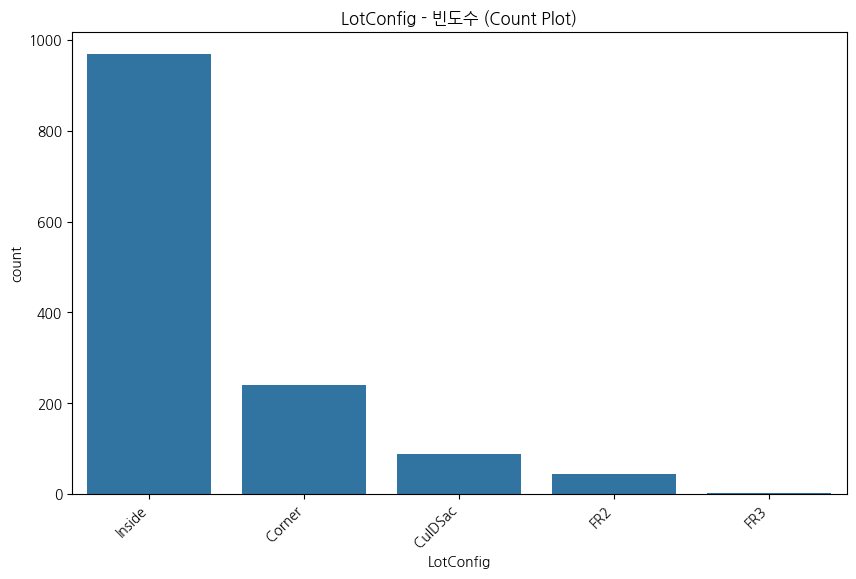

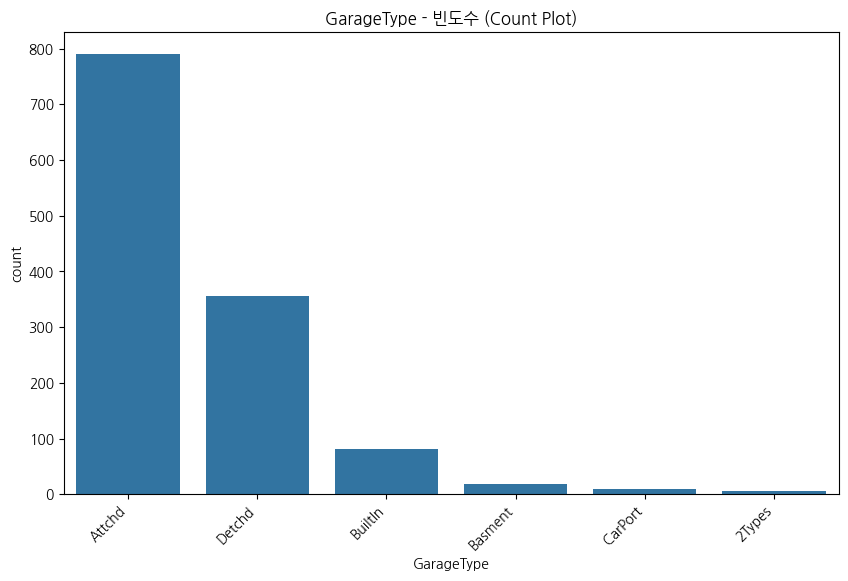

In [34]:
# 범주형 변수 분포 시각화
categorical_variables = dataset.select_dtypes(include=['object', 'category']).columns

if TARGET_COLUMN in categorical_variables:
    categorical_variables_excluding_target = categorical_variables.drop(TARGET_COLUMN)
else:
    categorical_variables_excluding_target = categorical_variables

print(f"\n--- 범주형 변수: {categorical_variables_excluding_target.tolist()} ---")

for col in categorical_variables_excluding_target:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataset, x=col, order=dataset[col].value_counts().index)
    plt.title(f'{col} - 빈도수 (Count Plot)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

## 타겟 변수 분포 시각화
타겟 변수가 있는 경우, 즉 SalePrice 가 있는 경우 시각화 (problemset 의 경우에는 SalePrice 항목이 없음)

Text(0.5, 1.0, '타겟 변수 (SalePrice) 분포 (Histogram & KDE)')

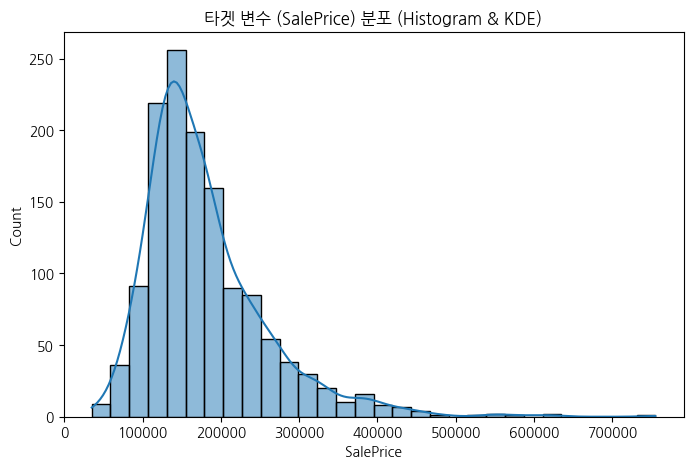

In [59]:
plt.figure(figsize=(8, 5))
sns.histplot(dataset[TARGET_COLUMN], kde=True, bins=30)
plt.title(f'타겟 변수 ({TARGET_COLUMN}) 분포 (Histogram & KDE)')

## 6. 변수 간 관계 분석 (이변량 및 다변량 분석)

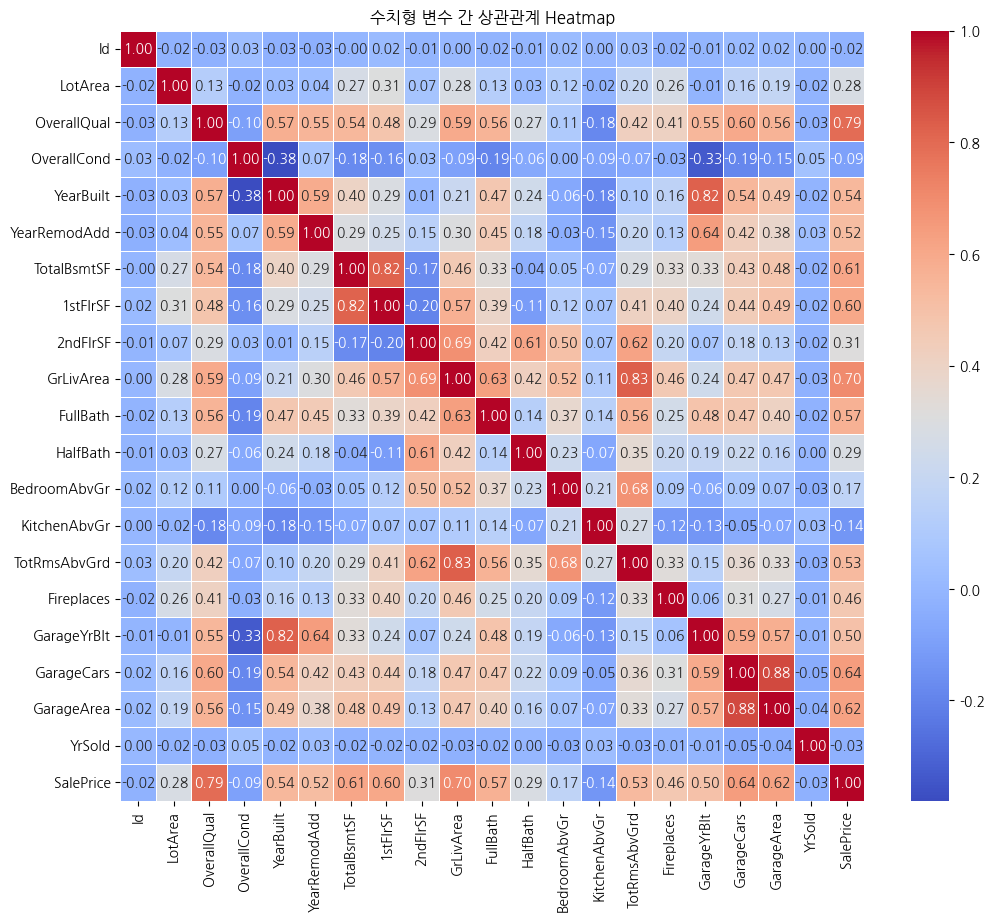

In [39]:
# 수치형 변수 간 상관관계 (Correlation Heatmap)
plt.figure(figsize=(12, 10))

# 수치형 데이터만 선택하여 상관계수 계산
corr_matrix = dataset[numerical_variables].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('수치형 변수 간 상관관계 Heatmap')
plt.show()

## 페어 플롯 (Pair Plot) - 수치형 변수들 간의 관계 시각화

파이썬의 데이터 시각화 라이브러리인 Seaborn에서 제공하는 매우 유용한 기능으로, 데이터셋에 있는 여러 변수(특성)들 간의 관계를 한 번에 시각화

### 용도

 - 변수 간 관계 파악: 여러 변수들 간의 모든 조합에 대한 관계를 한눈에 볼 수 있어, 어떤 변수들이 서로 관련이 있는지, 어떤 종류의 관계(선형, 비선형 등)를 가지는지 빠르게 파악할 수 있습니다.

 - 데이터 분포 확인: 각 변수의 개별적인 분포 형태(정규분포, 치우친 분포 등)를 동시에 확인할 수 있습니다.

 - 이상치(Outlier) 탐색: 산점도를 통해 특정 데이터 포인트가 다른 데이터들과 동떨어져 있는지 시각적으로 확인할 수 있습니다.

 - 집단 간 비교 (Hue 옵션 활용): hue 파라미터에 범주형 변수를 지정하면, 해당 범주의 각 값에 따라 점의 색상을 다르게 표시하여 여러 집단 간의 관계나 분포 차이를 비교 분석할 수 있습니다. 예를 들어, 붓꽃 데이터에서 품종(species)별로 각 특성 간의 관계가 어떻게 다른지 쉽게 확인할 수 있습니다.

 - 피처 엔지니어링 및 모델 선택 아이디어: 변수 간의 관계나 분포를 통해 새로운 파생 변수를 만들거나, 데이터에 적합한 머신러닝 모델을 선택하는 데 도움을 받을 수 있습니다.

주의: 변수가 너무 많으면 시간이 오래 걸리고 보기 어려울 수 있습니다. 주요 변수 몇 개만 선택하거나, 샘플링하여 사용하세요!

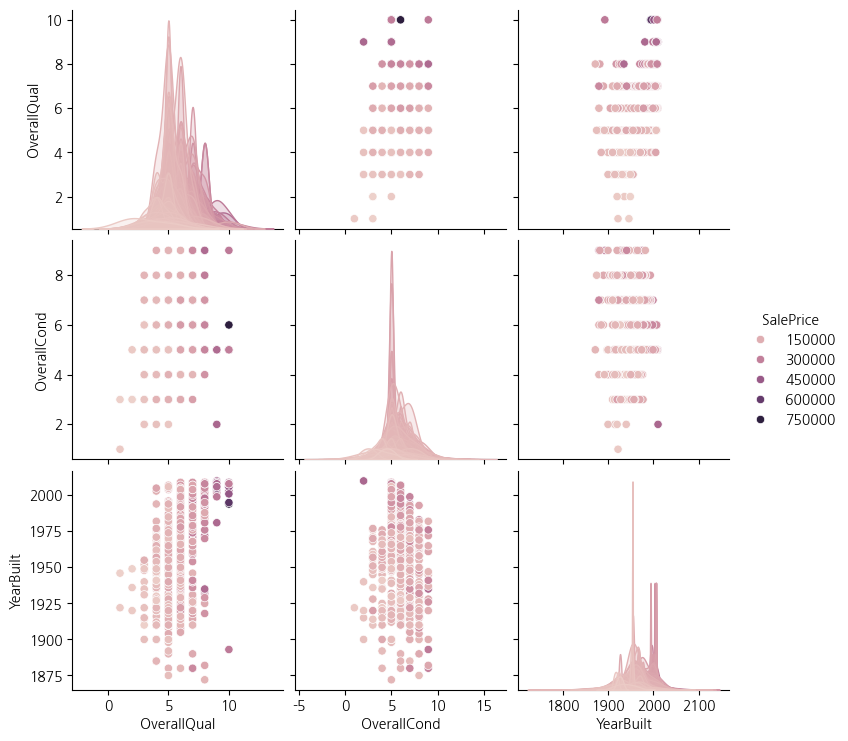

In [57]:
sns.pairplot(dataset, vars=numerical_variables_excluding_target[2:5], hue=TARGET_COLUMN, diag_kind='kde')

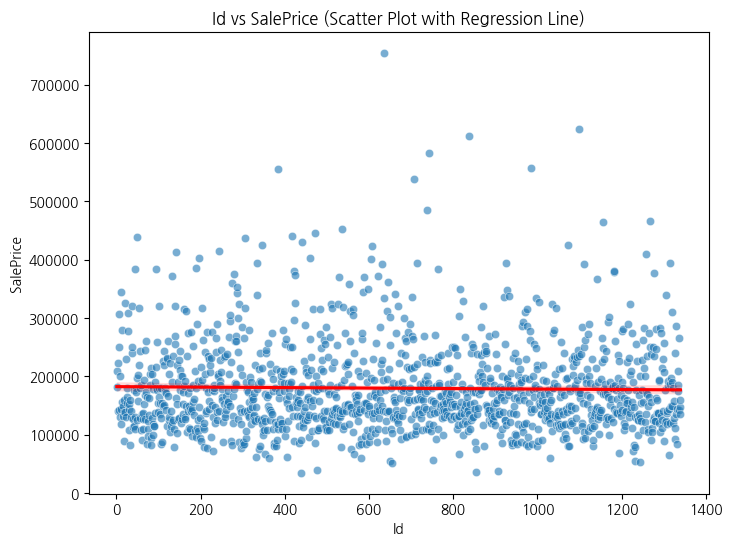

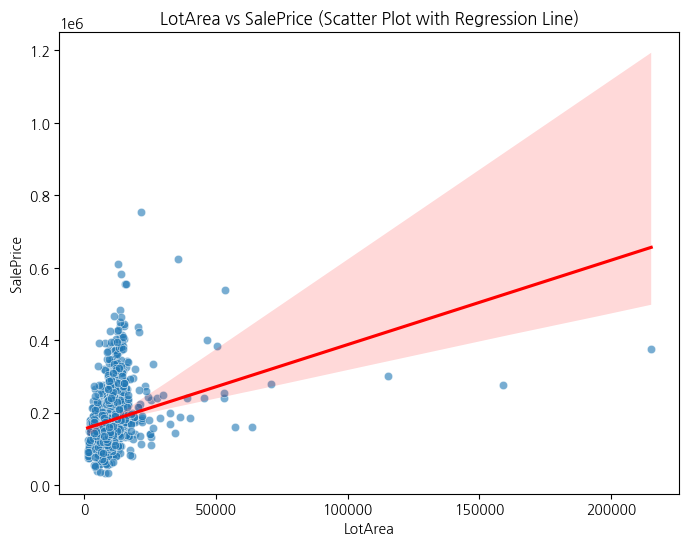

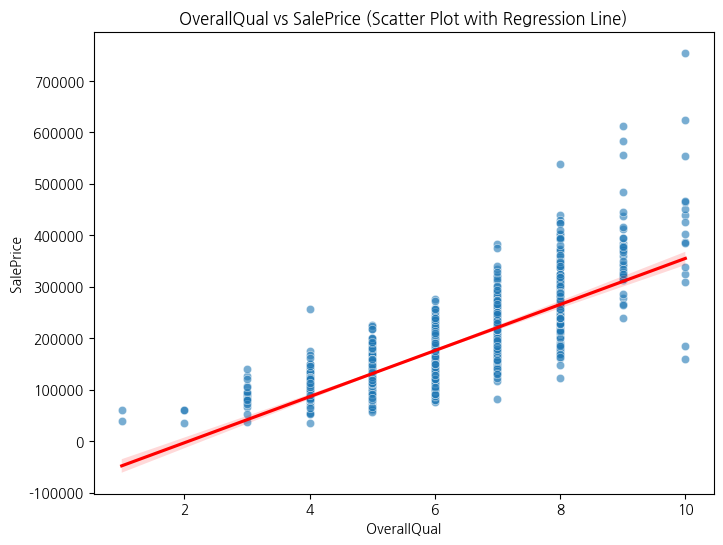

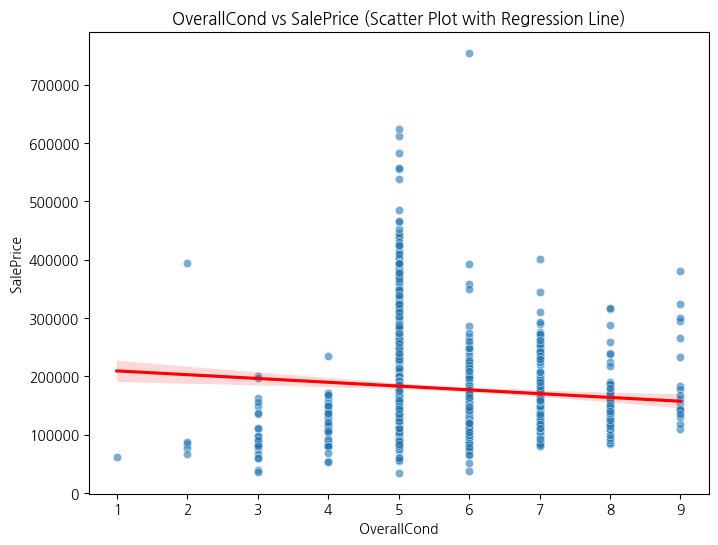

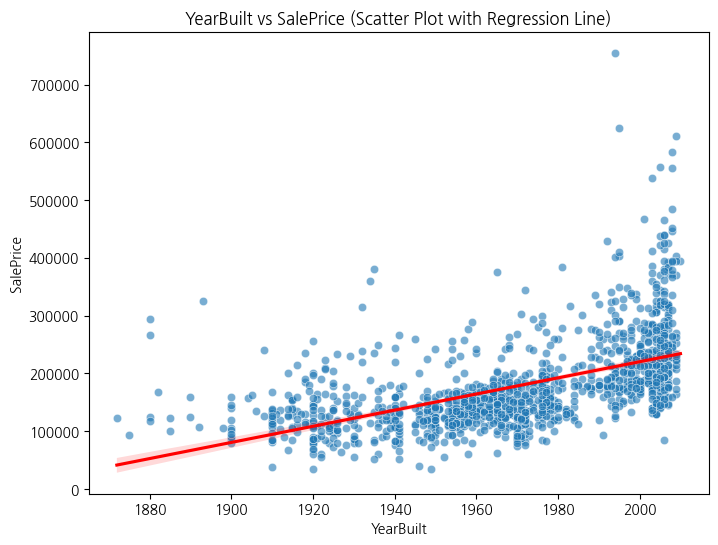

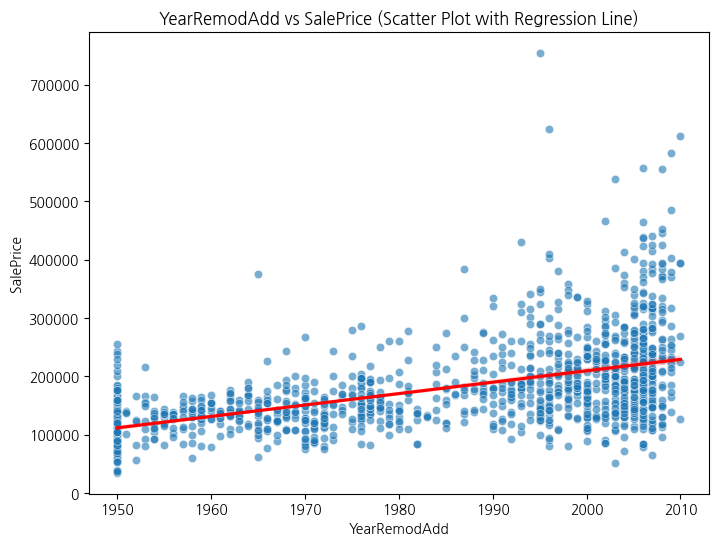

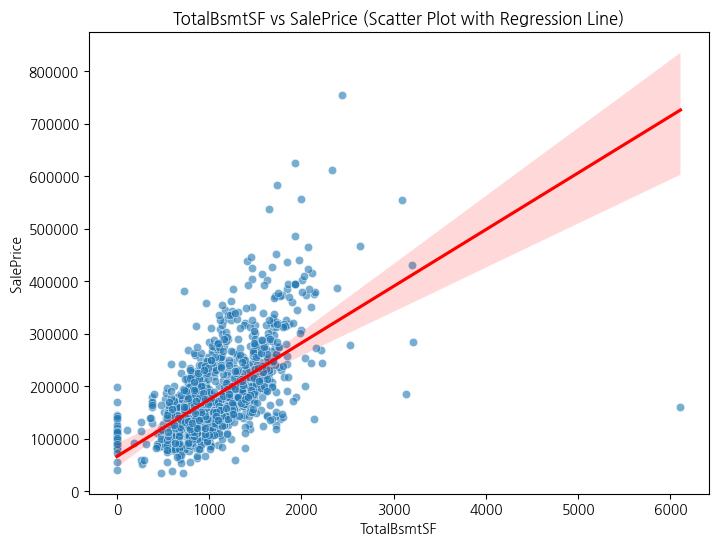

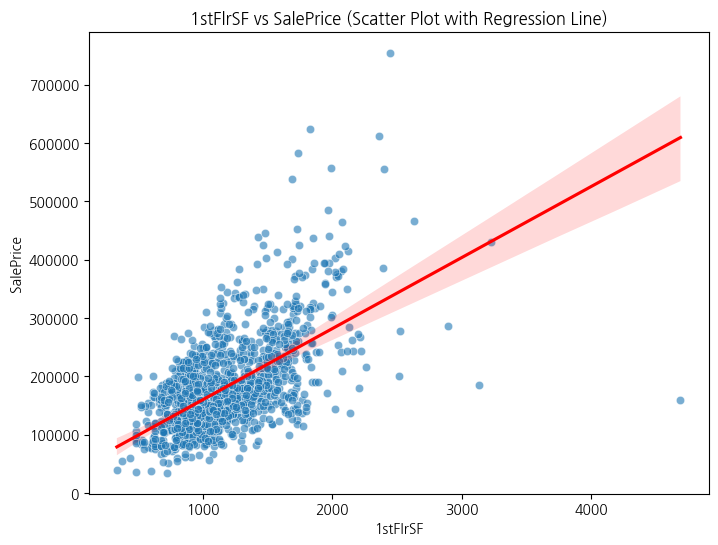

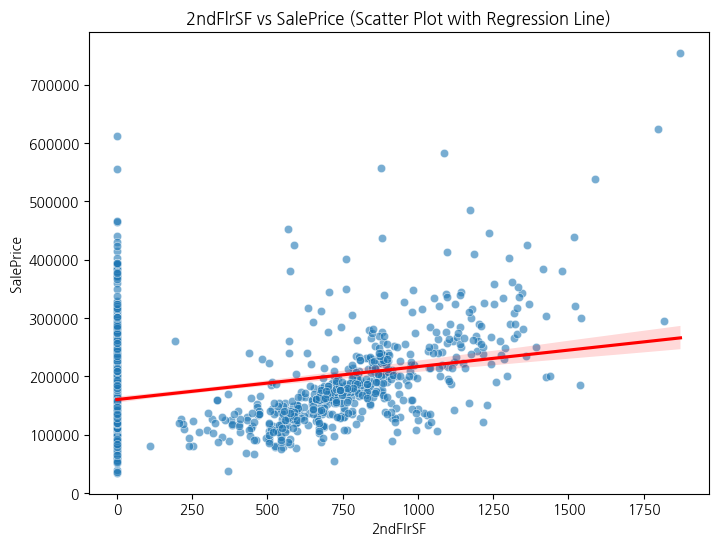

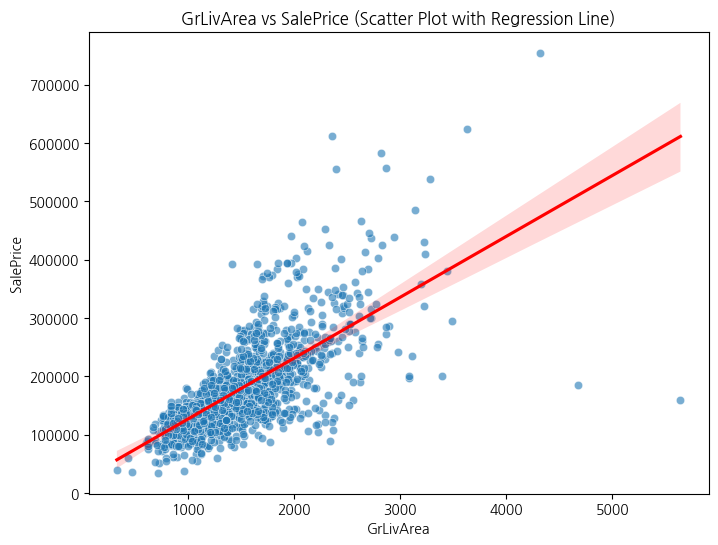

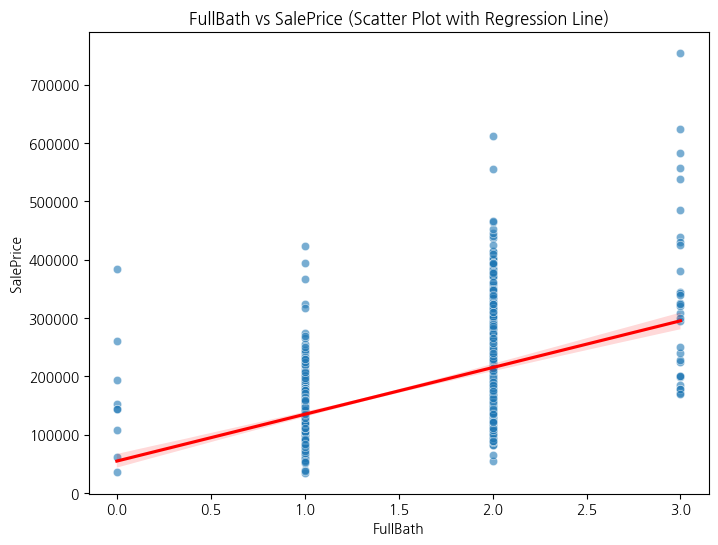

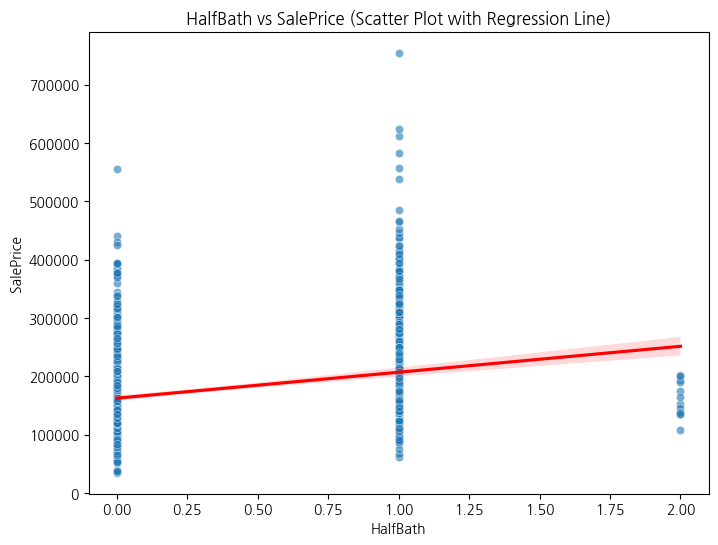

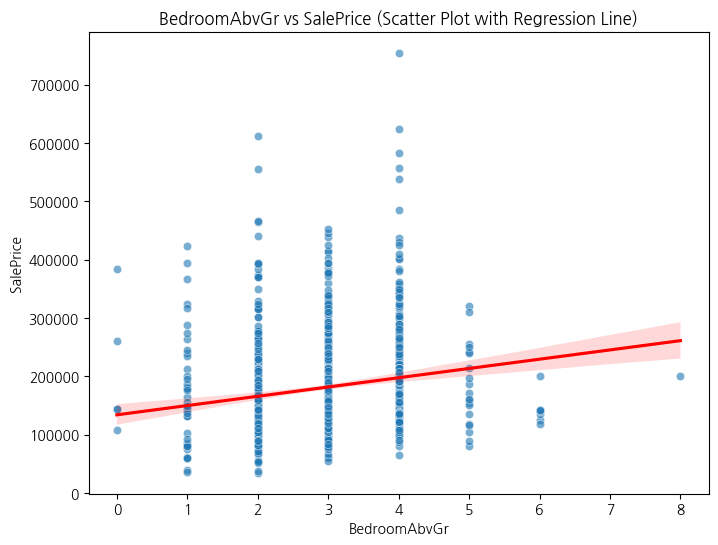

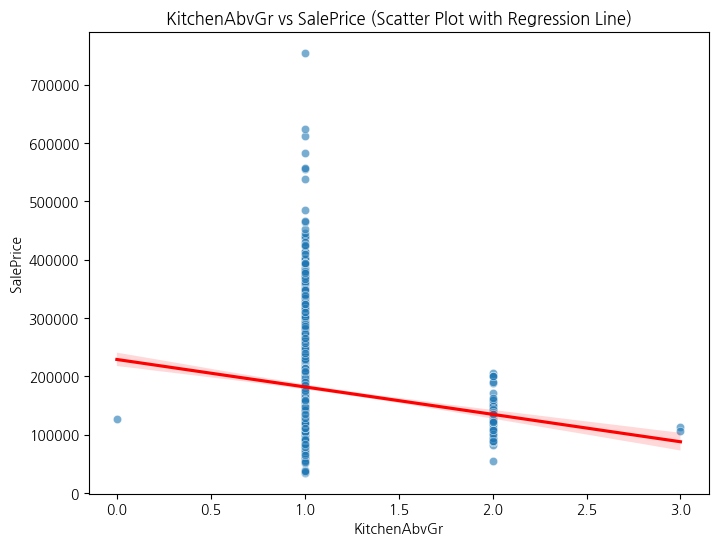

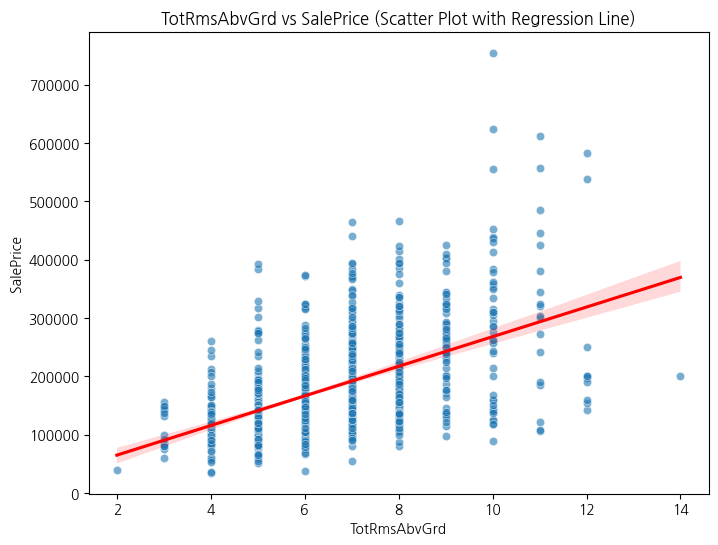

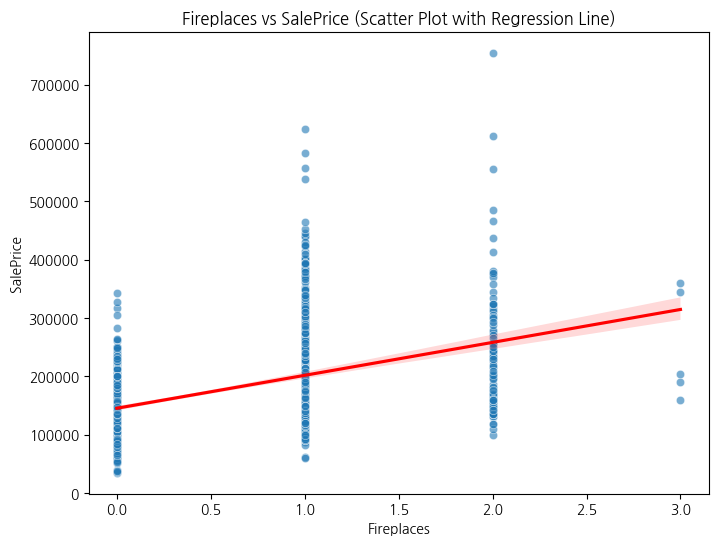

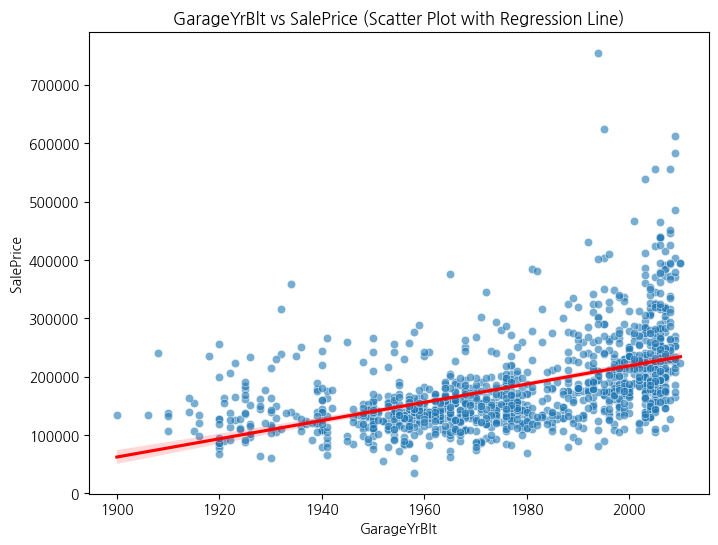

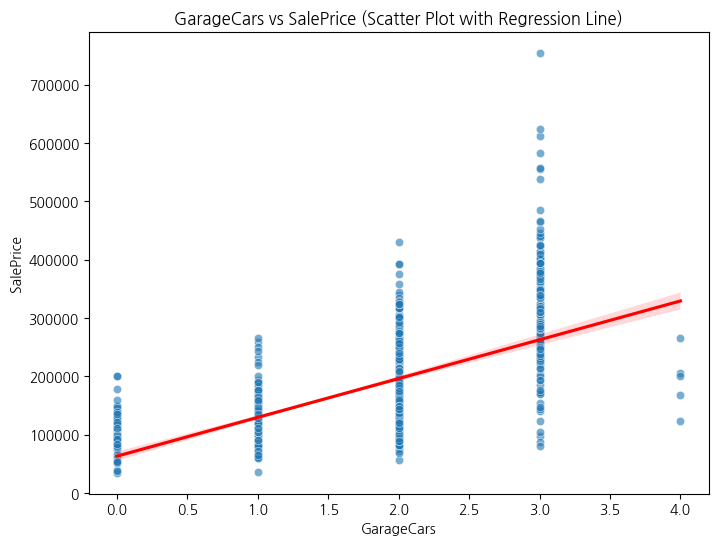

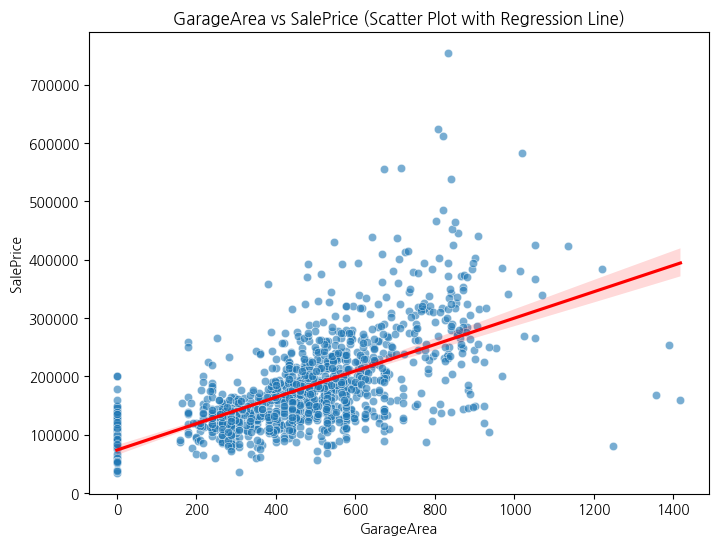

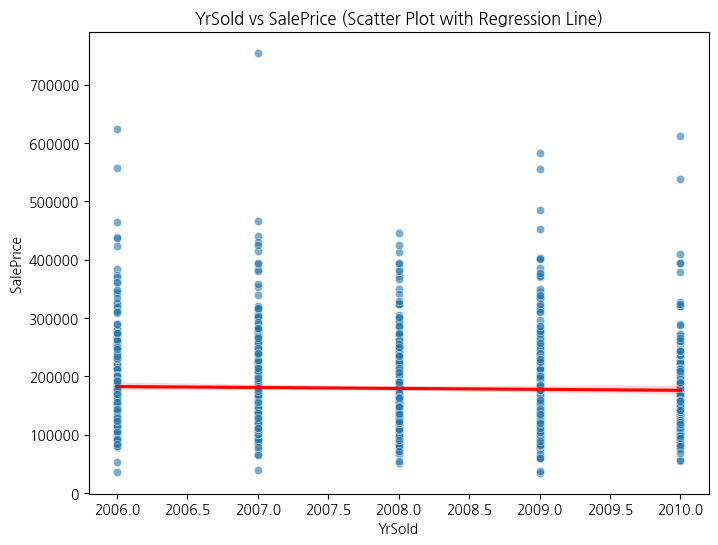

In [62]:
# 타겟 변수와 다른 변수들 간의 관계 분석
for num_col in numerical_variables_excluding_target:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=num_col, y=TARGET_COLUMN, data=dataset, alpha=0.6)

  # 추세선 추가 (선형 관계 확인)
  sns.regplot(x=num_col, y=TARGET_COLUMN, data=dataset, scatter=False, color='red')

  plt.title(f'{num_col} vs {TARGET_COLUMN} (Scatter Plot with Regression Line)')
  plt.show()

## 데이터 전처리 및 모델 학습

In [63]:
# data 와 problem 데이터들을 합쳐서 하나의 데이터로 만들어줍니다 --> 아래의 데이터 전처리 후 다시 분리할 예정
all_data = pd.concat([dataset, problemset], ignore_index=True)

# select_dtypes 함수를 사용하여 데이터 타입이 object(문자형 데이터)인 열을 제외
# select_dtypes 함수는 열에 포함된 데이터들을 type 기준으로 인덱싱 할 수 있도록 해줌
# select_dtypes(include=None, exclude=None) 형태를 가지며, include에 넣은값을 포함하고 exclude에 넣은 값을 제외한 columns(열)을 DaraFrame 형태로 반환함
all_data = all_data.select_dtypes(exclude="object")

# 결측치를 0으로 대체
all_data = all_data.fillna(0)

# Id 열을 제거
all_data = all_data.drop(["Id"], axis=1)

In [64]:
# 학습 데이터와 문제 데이터로 다시금 분리
train_data = all_data[: len(dataset)]
problem_data = all_data[len(dataset):]

In [65]:
# 학습 데이터의 SalePrice 열을 제외한 나머지 열을 X로 지정, SalePrice 열을 Y로 지정
X = train_data.drop("SalePrice", axis=1)
Y = train_data["SalePrice"]

In [66]:
# 모델 학습을 위해 학습 데이터를 80%의 학습 데이터(train)와 20%의 검증 데이터(test)로 나눔
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [67]:
# 랜덤 포레스트 모델을 사용하여 학습
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [68]:
# train 데이터와 test 데이터에 대한 예측값을 구하고 RMSE 값을 계산
from sklearn.metrics import mean_squared_error

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print("Train RMSE :", mean_squared_error(y_train, train_pred) ** 0.5)
print("Test RMSE :", mean_squared_error(y_test, test_pred) ** 0.5)

Train RMSE : 11892.731728282857
Test RMSE : 29624.429243008974


## Problem set 문제에 대한 집값예측 및 리더보드 결과 제출

- 아래 제출 프로세스가 느리다고 중지 후 다시 코드를 실행하는 경우 제출 과정에서 패널티가 발생할 수 있습니다. (제출 횟수 이슈 발생 가능: 최대 200회까지 가능)
- 제출에 성공할 경우, "제출에 성공하였습니다"의 메세지와 함께 제출 결과 RMSE 가 화면에 출력됩니다.
- 제출결과는 또한 [대회 페이지(리더보드 서버)](https://agtechlab.pythonanywhere.com/competitions/housingprice/)의 `리더보드` 와 `제출` 탭에서 확인할 수 있습니다.


In [69]:
# 전처리 과정 중에 SalePrice 가 0으로 채워져 있기 때문에, problem_data 에서 SalePrice를 다시 제거
problem_data = problem_data.drop("SalePrice", axis=1)
# 문제 데이터(problem data)에 대한 예측값을 구함
problem_pred = model.predict(problem_data)

In [70]:
# 리더보드 서버 제출을 위한 파일 생성
submission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))
submission["SalePrice"] = problem_pred

# 예측 결과 화면에 출력 후 제출
display(submission)
competition.submit(project, username, password, submission)

,Id,SalePrice
0,1341,135258.50
1,1342,129352.45
2,1343,152365.50
3,1344,133238.50
4,1345,104944.47
...,...,...
125,1466,287264.74
126,1467,164550.25
127,1468,75865.77
128,1469,102780.62


아이디:  abc@abc.com
파일명:  submissions/20250508-012726-submission.csv
[제출에 성공하였습니다]
제출 결과: 30583.635753956733
